In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv


In [2]:
 #1. Importing Required Libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
 #2.Importing Scikit-learn Modules 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [4]:
# 3. Importing Preprocessing Tools

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [5]:
#4.Model
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

In [6]:
#5. Ignore warnings for clean output
warnings.filterwarnings('ignore')

In [7]:
# Load datasets
df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")
test_data = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv")
sample_submission = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv")


# Step 1: Exploratory Data Analysis(EDA)

Exploratory Data Analysis helps in understanding the structure, distribution and patterns in the dataset. Below we explore the basic structure, summary statistics, and visualize the target variable.


In [8]:
# Overview of the Dataset
df.head()


,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0


From this, we can identify:
- Total number of entries
- Data types of each feature
- Columns with missing values

In [9]:
# Data Types and Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

In [10]:
# Summary Statistics
df.describe()

,purchaseValue,userId,gclIdPresent,sessionNumber,totals.visits,sessionId,trafficSource.adwordsClickInfo.page,pageViews,locationZone,totals.bounces,date,totalHits,sessionStart,new_visits
count,1.160230e+05,116023.000000,116023.000000,116023.000000,116023.0,1.160230e+05,4281.000000,116015.000000,116023.0,47148.0,1.160230e+05,116023.000000,1.160230e+05,80518.0
mean,2.656393e+07,61094.356231,0.037019,2.691311,1.0,1.493429e+09,1.019622,8.412352,8.0,1.0,2.016860e+07,10.607371,1.493429e+09,1.0
std,2.051825e+08,35240.756859,0.188808,10.451613,0.0,1.528798e+07,0.174517,14.344937,0.0,0.0,6.182322e+03,19.629576,1.528798e+07,0.0
min,0.000000e+00,0.000000,0.000000,1.000000,1.0,1.470035e+09,1.000000,1.000000,8.0,1.0,2.016080e+07,1.000000,1.470035e+09,1.0
25%,0.000000e+00,30603.500000,0.000000,1.000000,1.0,1.480066e+09,1.000000,1.000000,8.0,1.0,2.016112e+07,1.000000,1.480066e+09,1.0
50%,0.000000e+00,61014.000000,0.000000,1.000000,1.0,1.491646e+09,1.000000,2.000000,8.0,1.0,2.017041e+07,2.000000,1.491646e+09,1.0
75%,0.000000e+00,91616.500000,0.000000,2.000000,1.0,1.505079e+09,1.000000,10.000000,8.0,1.0,2.017091e+07,12.000000,1.505079e+09,1.0
max,2.312950e+10,122276.000000,1.000000,447.000000,1.0,1.525157e+09,5.000000,469.000000,8.0,1.0,2.018043e+07,500.000000,1.525157e+09,1.0


This helps detect outliers, skewness, and overall distribution. Notably, `purchaseValue` has a high standard deviation, indicating possible outliers.

we use a boxplot to detect extreme values in the `purchaseValue` column.

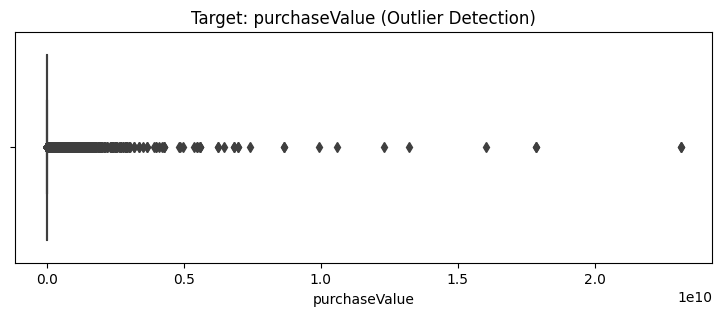

In [11]:
# Boxplot to check outliers
plt.figure(figsize=(9, 3))
sns.boxplot(x=df["purchaseValue"])
plt.title("Target: purchaseValue (Outlier Detection)")
plt.show()

 From the plot, it was clear that the target is right-skewed and has some large outliers, which could impact model performance later.


# Step 2: Data Cleaning and Preprocessing

In this step, we clean the dataset by removing irrelevant or low-information columns, handling outliers, and engineering useful date/session-based features for better model performance.

**1. Dropping Columns containing >90% null value**

In [12]:
drop_coll = df.columns[df.isnull().mean() > 0.9]
df = df.drop(drop_coll, axis=1)
df.shape

(116023, 47)

**2. dropping columns containing 1 unique value**

Columns having only one unique value provide no variation and are removed.

In [13]:
df = df.loc[:, df.nunique() > 1]
df.shape

(116023, 27)

**3. Handling Outliers**

Outliers in numerical features can distort model performance. We detect and cap them using the Interquartile Range (IQR) method.

In [14]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

purchaseValue: 23985 outliers
userId: 0 outliers
gclIdPresent: 4295 outliers
sessionNumber: 14116 outliers
sessionId: 0 outliers
pageViews: 12419 outliers
date: 0 outliers
totalHits: 13154 outliers
sessionStart: 0 outliers


In [15]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower, upper)
    return df

for col in ["sessionNumber", "pageViews", "totalHits"]:
    df = cap_outliers_iqr(df, col)

**4. Feature Extraction ( – Date Features,Session Timestamp )**

In [16]:

#We extract useful features such as day, month, and weekend indicator from the date column.
def extract_date_features(X):
    df = X.copy()
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    df["day"] = df["date"].dt.day
    df["month"] = df["date"].dt.month
    df["is_weekend"] = df["date"].dt.dayofweek.isin([5, 6]).astype(int)
    return df[["day", "month", "is_weekend"]]

date_pipeline = Pipeline([
    ("extract", FunctionTransformer(extract_date_features)),
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder())
])


#We extract temporal features such as hour, day, weekday, and month from the session start timestamp

def extract_session_features(X):
    dt = pd.to_datetime(X["sessionStart"], unit='s')
    df = pd.DataFrame()
    df["sessionHour"] = dt.dt.hour
    df["sessionDay"] = dt.dt.day
    df["sessionWeekday"] = dt.dt.weekday
    df["sessionMonth"] = dt.dt.month
    return df

session_pipeline = Pipeline([
    ("extract", FunctionTransformer(extract_session_features)),
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder())
])


**5. Group rare categories into "Other"**

To reduce high cardinality and avoid overfitting, we group less frequent or rare categories in selected columns into a new category called "Other". This is done using a custom transformer RareCategoryGrouper, which retains the top N most frequent categories and groups the rest.

In [17]:
# Custom Transformer to Group Rare Categories
#allow us to apply any  custom python function as part of preprocessing pipeline.
from sklearn.base import BaseEstimator, TransformerMixin

class RareCategoryGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, top_n_dict):
        """
        top_n_dict: dictionary where keys are column names and values
                    are the number of top categories to keep.
        """
        self.top_n_dict = top_n_dict
        self.top_categories_ = {}

    def fit(self, X, y=None):
        # For each column, determine the top categories to keep.
        for col in X.columns:
            n = self.top_n_dict.get(col, 10)  # default to 10 if not specified
            self.top_categories_[col] = X[col].value_counts().nlargest(n).index
        return self

    def transform(self, X):
        X_copy = X.copy()
        # Replace all values not in the top categories with "Other"
        for col in X_copy.columns:
            top_cats = self.top_categories_.get(col, [])
            X_copy[col] = X_copy[col].apply(lambda x: x if x in top_cats else 'Other')
        return X_copy
        
top_n_dict = {
    'browser': 9,
    'trafficSource': 9,
    'os': 7,
    'geoNetwork.subContinent': 16,
    'locationCountry': 65
}


**6. Define feature groups**

Now we define the feature groups based on the nature of the columns and apply appropriate preprocessing steps.

In [18]:
numeric_cols = ['sessionNumber', 'pageViews', 'userId','sessionId','totalHits']

date_cols = ['date']
session_cols = ['sessionStart']
grouped_cols =['browser', 'trafficSource', 'os', 'geoNetwork.subContinent', 'locationCountry']
categ_cols =['geoCluster','geoNetwork.region','trafficSource.campaign','gclIdPresent','geoNetwork.networkDomain','trafficSource.medium','deviceType','userChannel','geoNetwork.continent']


 **7. Create preprocessing pipelines for each feature group**

 We define individual preprocessing pipelines for each group of features using sklearn.pipeline.Pipeline. These pipelines include imputation, scaling, feature extraction, and encoding, depending on the feature type.

In [19]:

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

date_pipeline = Pipeline([
    ("extract", FunctionTransformer(extract_date_features)),
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder())
])

session_pipeline = Pipeline([
    ("extract", FunctionTransformer(extract_session_features)),
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder())
])

grouped_pipe = Pipeline(steps=[
    ('rare_grouping', RareCategoryGrouper(top_n_dict=top_n_dict)),
    ('imputer', SimpleImputer(strategy='most_frequent')),  # fills any missing values
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])


#### 8. Combine Pipelines using ColumnTransformer

We use `ColumnTransformer` to apply all the individual pipelines to their respective feature groups in a single step. This unified preprocessing block ensures that all types of features are appropriately handled before model training.


In [20]:
ct = ColumnTransformer([
    ("numeric", num_pipeline, numeric_cols),
    ("categorical", cat_pipeline, categ_cols),
    ("grouped", grouped_pipe, grouped_cols),
    ("session", session_pipeline, session_cols),
    ("date", date_pipeline, date_cols)
])

# Step 3:Model Building and Evaluation

**Define XGBoost Regressor and Pipeline**

We initialize the XGBRegressor model and build a pipeline by chaining it with the preprocessing steps created earlier (ColumnTransformer ct).

In [21]:
import numpy as np

# Initialize the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)

# Create full pipeline with preprocessing and model
full_pipeline = Pipeline(steps=[
    ("preprocessing", ct),
    ("model", xgb_model)
])


**Define Hyperparameter Grid for RandomizedSearchCV**

to optimize model performance, we tune the hyperparameters of XGBoost using RandomizedSearchCV with a wide range of values for each key parameter.

In [22]:
# Define hyperparameter space
param_dist = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7, 10],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__gamma': [0, 0.1, 0.3, 1],#Minimum loss reduction required to split a node.
    'model__reg_alpha': [0, 0.1, 0.5, 1],#Helps remove irrelevant features.
    'model__reg_lambda': [0.5, 1, 1.5]#prevent overfitting.
}

# Initialize RandomizedSearchCV
search = RandomizedSearchCV(
    estimator=full_pipeline,
    param_distributions=param_dist,
    n_iter=10,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    error_score='raise'
)


**Train-Test Split and Model Training**

We split the dataset into training and testing sets and fit the full pipeline using RandomizedSearchCV on the training data.



In [23]:
# Separate features and target
X = df.drop(columns=["purchaseValue"])
y = df["purchaseValue"]

# Split data into training and Validation set
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['purchaseValue']), 
    df['purchaseValue'], test_size=0.2, random_state=42)

In [24]:
#fit model
search.fit(X,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scale',
                                                                                                StandardScaler())]),
                                                                               ['sessionNumber',
                                                                                'pageViews',
                                                                                'userId',
                                                                                'sessionId',
                                                                                'totalHits']),
                                                                              ('categorical',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer(strategy='mo...
                                                           random_state=42, ...))]),
                   n_jobs=-1,
                   param_distributions={'model__colsample_bytree': [0.6, 0.8,
                                                                    1.0],
                                        'model__gamma': [0, 0.1, 0.3, 1],
                                        'model__learning_rate': [0.01, 0.05,
                                                                 0.1, 0.2],
                                        'model__max_depth': [3, 5, 7, 10],
                                        'model__n_estimators': [100, 200, 300],
                                        'model__reg_alpha': [0, 0.1, 0.5, 1],
                                        'model__reg_lambda': [0.5, 1, 1.5],
                                        'model__subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='r2', verbose=2)

**Model Evaluation**

We evaluate the model on the test set using R² Score and Mean Absolute Error (MAE).

In [25]:
#Predict on test set
y_pred = search.predict(x_test)

# Evaluate performance
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.9446315456270457
MAE: 14404593.91290142


**Tuned LightGBM Regressor**

This pipeline integrates the LightGBM regressor with the preprocessing steps defined earlier. The hyperparameters were manually tuned to improve model performance. LightGBM is known for its speed and accuracy in handling large datasets with many features.

In [26]:
# Initialize a LightGBM model with manual tuning
lgbm_model = LGBMRegressor(
    n_estimators=700,
    learning_rate=0.03,
    max_depth=12,
    num_leaves=64,
    min_child_samples=30,
    subsample=0.8,
    colsample_bytree=0.7,
    reg_alpha=0.5,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

# Build a pipeline that combines preprocessing and the LightGBM model
lgbm_pipeline = Pipeline(steps=[
    ("preprocessing", ct),   
    ("model", lgbm_model)
])

In [27]:
#Fit model
lgbm_pipeline.fit(X,y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1252
[LightGBM] [Info] Number of data points in the train set: 116023, number of used features: 346
[LightGBM] [Info] Start training from score 26563930.071796


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['sessionNumber', 'pageViews',
                                                   'userId', 'sessionId',
                                                   'totalHits']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown=...
                                                                   FunctionTransformer(func=<function extract_date_features at 0x7f7c55dc8040>)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['date'])])),
                ('model',
                 LGBMRegressor(colsample_bytree=0.7, learning_rate=0.03,
                               max_depth=12, min_child_samples=30,
                               n_estimators=700, n_jobs=-1, num_leaves=64,
                               random_state=42, reg_alpha=0.5, reg_lambda=1.0,
                               subsample=0.8))])

**Model Evaluation**

In [28]:
# predict on validation set
y_pred = lgbm_pipeline.predict(x_test)

# Evaluate performance
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.5931347861812823
MAE: 25214420.538074777


**Tuned RandomForestRegressor**

We also train a RandomForestRegressor with manually tuned hyperparameters. Random Forest is robust to overfitting and works well on a variety of problems by averaging predictions from multiple decision trees.


In [29]:
#Initialize a tuned RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=18,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,  #sampling with replacement is used to build different trees
    random_state=42,
    n_jobs=-1
)

# Create a pipeline for RandomForest
rf_pipeline = Pipeline(steps=[
    ("preprocessing", ct),
    ("model", rf_model)
])

In [30]:
#Fit model
rf_pipeline.fit(X,y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['sessionNumber', 'pageViews',
                                                   'userId', 'sessionId',
                                                   'totalHits']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown=...
                                                 ('date',
                                                  Pipeline(steps=[('extract',
                                                                   FunctionTransformer(func=<function extract_date_features at 0x7f7c55dc8040>)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['date'])])),
                ('model',
                 RandomForestRegressor(max_depth=18, max_features='sqrt',
                                       min_samples_leaf=2, min_samples_split=4,
                                       n_estimators=500, n_jobs=-1,
                                       random_state=42))])

**Model Evaluation**

In [31]:
# predict on validation set
y_pred = rf_pipeline.predict(x_test)

# Evaluate performance
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.3924616819629584
MAE: 27638187.227417834


The XGBoost Regressor significantly outperforms the other models in both R² Score and MAE, indicating a better fit and lower prediction error on the validation set.

# Step 4: Predict on  Test Data

After evaluating the models, we use the best-performing model which is XGBoost Regressor to generate predictions on the test dataset

In [32]:
#Final Predictions on Test Data
test_preds =  search.predict(test_data)
test_preds = np.clip(test_preds, 0, None)

We then create a submission file in the required format with:

-id column from the sample submission file

-purchaseValue as the predicted values (clipped to remove negative predictions)



In [33]:
#creating final submission file
submission = pd.DataFrame({
    'id': sample_submission['ID'],
    'purchaseValue': test_preds
})

In [34]:
submission.to_csv('submission.csv', index=False)

In [35]:
import os
print("Files in /kaggle/working:")
print(os.listdir('/kaggle/working'))


Files in /kaggle/working:
['.virtual_documents', 'submission.csv']
[CV] END model__colsample_bytree=1.0, model__gamma=0.1, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100, model__reg_alpha=1, model__reg_lambda=0.5, model__subsample=0.6; total time=  25.1s
[CV] END model__colsample_bytree=0.6, model__gamma=0, model__learning_rate=0.05, model__max_depth=10, model__n_estimators=300, model__reg_alpha=1, model__reg_lambda=1, model__subsample=1.0; total time= 1.1min
[CV] END model__colsample_bytree=0.8, model__gamma=0.3, model__learning_rate=0.2, model__max_depth=7, model__n_estimators=300, model__reg_alpha=0.1, model__reg_lambda=1, model__subsample=0.6; total time=  54.0s
[CV] END model__colsample_bytree=0.8, model__gamma=0.3, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__reg_alpha=0.1, model__reg_lambda=1.5, model__subsample=0.8; total time=  28.7s
[CV] END model__colsample_bytree=1.0, model__gamma=0.1, model__learning_rate=0.2, model_

In [4]:
import pandas as pd

In [9]:
train_df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")

In [12]:
train_df.columns

Index(['trafficSource.isTrueDirect', 'purchaseValue', 'browser',
       'device.screenResolution', 'trafficSource.adContent',
       'trafficSource.keyword', 'screenSize', 'geoCluster',
       'trafficSource.adwordsClickInfo.slot', 'device.mobileDeviceBranding',
       'device.mobileInputSelector', 'userId', 'trafficSource.campaign',
       'device.mobileDeviceMarketingName', 'geoNetwork.networkDomain',
       'gclIdPresent', 'device.operatingSystemVersion', 'sessionNumber',
       'device.flashVersion', 'geoNetwork.region', 'trafficSource',
       'totals.visits', 'geoNetwork.networkLocation', 'sessionId', 'os',
       'geoNetwork.subContinent', 'trafficSource.medium',
       'trafficSource.adwordsClickInfo.isVideoAd', 'browserMajor',
       'locationCountry', 'device.browserSize',
       'trafficSource.adwordsClickInfo.adNetworkType', 'socialEngagementType',
       'geoNetwork.city', 'trafficSource.adwordsClickInfo.page',
       'geoNetwork.metro', 'pageViews', 'locationZone',
      

In [20]:
X = train_df.drop(columns=["purchaseValue"])
y =train_df["purchaseValue"]

In [22]:
x_train,x_test,y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)